In [1]:
import netCDF4 as nc
from salishsea_tools import tidetools, nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

In [2]:
## for 2D Domain:

f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SalishSea2D_00/rivers/river_cnst.nc')

In [3]:
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    description: Constant Yearly Average, One River
    dimensions(sizes): x(1100), y(10), time_counter(1)
    variables(dimensions): float32 y(y,x), float32 x(y,x), float32 time_counter(time_counter), float32 rorunoff(time_counter,y,x), float32 rodepth(y,x)
    groups: 



In [5]:
print(np.max(f.variables['rorunoff']))

1.32128


In [6]:
new=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01_River/rivers/river_cnst.nc','w')
#newb=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_36ExpSOGTidesRivers/rivers/river_cnst_bio.nc','w')
new.createDimension('y', 10)
new.createDimension('x', 1100)
new.createDimension('time_counter', None)

new_x=new.createVariable('x',float,('y','x'),zlib=True)
new_x[:]=f.variables['x'][:,:]

new_y=new.createVariable('y',float,('y','x'),zlib=True)
new_y[:]=f.variables['y'][:,:]

new_tc=new.createVariable('time_counter',float,('time_counter'),zlib=True)
new_tc[:]=f.variables['time_counter']

new_run=new.createVariable('rorunoff',float,('time_counter', 'y', 'x'),zlib=True)
new_run.setncattr('units',f.variables['rorunoff']._units)
new_run[:]=f.variables['rorunoff'][:,:,:]

new_depth=new.createVariable('rodepth',float,('y','x'),zlib=True)
new_depth.setncattr('units',f.variables['rodepth'].units)
new_depth[:]=f.variables['rodepth'][:,:]

new_T=new.createVariable('T',float,('time_counter', 'y', 'x'),zlib=True)
new_T.setncattr('units','C')
new_T.setncattr('long_name','Temperature')
new_T[:]=23.0*f.variables['rorunoff'][:,:,:]

new_S=new.createVariable('S',float,('time_counter', 'y', 'x'),zlib=True)
new_S.setncattr('units','none')
new_S.setncattr('long_name','Salinity')
new_S[:]=0.0*f.variables['rorunoff'][:,:,:]+30.0

In [9]:
print(new.variables['rorunoff'])

<class 'netCDF4._netCDF4.Variable'>
float64 rorunoff(time_counter, y, x)
    units: kg m-2 s-1
unlimited dimensions: time_counter
current shape = (1, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [10]:
new.close()

new=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01_River/rivers/river_bio.nc','w')
#newb=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_36ExpSOGTidesRivers/rivers/river_cnst_bio.nc','w')
new.createDimension('y', 10)
new.createDimension('x', 1100)
new.createDimension('time_counter', None)

new_x=new.createVariable('x',float,('y','x'),zlib=True)
new_x[:]=f.variables['x'][:,:]

new_y=new.createVariable('y',float,('y','x'),zlib=True)
new_y[:]=f.variables['y'][:,:]

new_tc=new.createVariable('time_counter',float,('time_counter'),zlib=True)
new_tc[:]=f.variables['time_counter']

new_run=new.createVariable('no3',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=10.0

new_run=new.createVariable('nh4',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=1.0

new_run=new.createVariable('sil',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=10.0

new_run=new.createVariable('dia',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=0.01

new_run=new.createVariable('phy',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=0.01

new_run=new.createVariable('mes',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=0.0

new_run=new.createVariable('zoo',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=0.0

new_run=new.createVariable('don',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=2.0

new_run=new.createVariable('pon',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=2.0

new_run=new.createVariable('bsi',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=2.0

new_run=new.createVariable('oxy',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=-999.0

new.close()

In [11]:
f.close()

In [14]:
## for full Domain:

f=nc.Dataset('/results/forcing/rivers/RLonFraCElse_y2016m01d23.nc') # example for dims

In [15]:
print(f.dimensions['y'])

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898



In [16]:
new=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/rivers/river_cnst_bio_full.nc','w')

In [17]:
#Copy dimensions
for dname, the_dim in f.dimensions.items():
    print (dname, len(the_dim) if not the_dim.isunlimited() else None)
    new.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)
# create dimension variables:
new_x=new.createVariable('x',float,('y','x'),zlib=True)
new_x[:]=f.variables['x'][:,:]

new_y=new.createVariable('y',float,('y','x'),zlib=True)
new_y[:]=f.variables['y'][:,:]

new_tc=new.createVariable('time_counter',float,('time_counter'),zlib=True)
new_tc[:]=f.variables['time_counter']



x 398
y 898
time_counter None


In [18]:
new_x=new.createVariable('x',float,('y','x'),zlib=True)
new_x[:]=f.variables['x'][:,:]

new_y=new.createVariable('y',float,('y','x'),zlib=True)
new_y[:]=f.variables['y'][:,:]

new_tc=new.createVariable('time_counter',float,('time_counter'),zlib=True)
new_tc[:]=f.variables['time_counter']

new_run=new.createVariable('rorunoff',float,('time_counter', 'y', 'x'),zlib=True)
new_run.setncattr('units',f.variables['rorunoff']._units)
new_run[:]=f.variables['rorunoff'][:,:,:]

new_depth=new.createVariable('rodepth',float,('y','x'),zlib=True)
new_depth.setncattr('units',f.variables['rodepth'].units)
new_depth[:]=f.variables['rodepth'][:,:]

new_T=new.createVariable('T',float,('time_counter', 'y', 'x'),zlib=True)
new_T.setncattr('units','C')
new_T.setncattr('long_name','Temperature')
new_T[:]=23.0*f.variables['rorunoff'][:,:,:]

new_S=new.createVariable('S',float,('time_counter', 'y', 'x'),zlib=True)
new_S.setncattr('units','none')
new_S.setncattr('long_name','Salinity')
new_S[:]=5.0*f.variables['rorunoff'][:,:,:]

new.close()

new=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01_River/rivers/river_bio.nc','w')
#newb=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_36ExpSOGTidesRivers/rivers/river_cnst_bio.nc','w')
new.createDimension('y', 10)
new.createDimension('x', 1100)
new.createDimension('time_counter', None)

new_x=new.createVariable('x',float,('y','x'),zlib=True)
new_x[:]=f.variables['x'][:,:]

new_y=new.createVariable('y',float,('y','x'),zlib=True)
new_y[:]=f.variables['y'][:,:]

new_tc=new.createVariable('time_counter',float,('time_counter'),zlib=True)
new_tc[:]=f.variables['time_counter']

new_run=new.createVariable('no3',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:,:,:]=10.0

new_run=new.createVariable('nh4',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=1.0

new_run=new.createVariable('sil',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=10.0

new_run=new.createVariable('dia',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=1.0

new_run=new.createVariable('phy',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=1.0

new_run=new.createVariable('mes',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=0.0

new_run=new.createVariable('zoo',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=0.0

new_run=new.createVariable('don',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=10.0

new_run=new.createVariable('pon',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=10.0

new_run=new.createVariable('bsi',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=10.0

new_run=new.createVariable('oxy',float,('time_counter', 'y', 'x'),zlib=True)
new_run[:]=160.0

new.close()

KeyError: 'x'

In [5]:
test=nc.Dataset('/data/eolson/MEOPAR/SS36runs/run_SOG_01_River/rivers/river_bio.nc')

In [6]:
print(np.max(test.variables['dia']))

9.96920996839e+36


In [7]:
print(test.variables.keys)

<bound method OrderedDict.keys of OrderedDict([('x', <class 'netCDF4._netCDF4.Variable'>
float64 x(y, x)
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('y', <class 'netCDF4._netCDF4.Variable'>
float64 y(y, x)
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('time_counter', <class 'netCDF4._netCDF4.Variable'>
float64 time_counter(time_counter)
unlimited dimensions: time_counter
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('no3', <class 'netCDF4._netCDF4.Variable'>
float64 no3(time_counter, y, x)
unlimited dimensions: time_counter
current shape = (2, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('nh4', <class 'netCDF4._netCDF4.Variable'>
float64 nh4(time_counter, y, x)
unlimited dimensions: time_counter
current shape = (2, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36

In [7]:
test.close()
f.close()

In [3]:
print(f.variables.keys)

<bound method OrderedDict.keys of OrderedDict([('y', <class 'netCDF4._netCDF4.Variable'>
float32 y(y, x)
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('x', <class 'netCDF4._netCDF4.Variable'>
float32 x(y, x)
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('time_counter', <class 'netCDF4._netCDF4.Variable'>
float32 time_counter(time_counter)
    units: non-dim
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('rorunoff', <class 'netCDF4._netCDF4.Variable'>
float32 rorunoff(time_counter, y, x)
    _Fillvalue: 0.0
    _missing_value: 0.0
    _units: kg m-2 s-1
unlimited dimensions: time_counter
current shape = (1, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('rodepth', <class 'netCDF4._netCDF4.Variable'>
float32 rodepth(y, x)
    _Fillvalue: -1.0
    missi

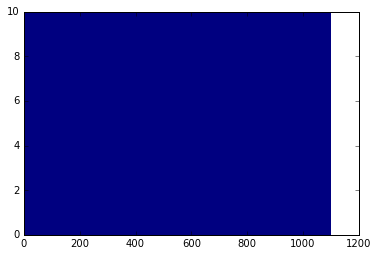

In [8]:
plt.pcolormesh(f.variables['rorunoff'][0,:,:])

In [25]:
print(f.variables['rorunoff'][0,:,1098])

[ 0.          1.32127547  1.32127547  1.32127547  1.32127547  1.32127547
  1.32127547  1.32127547  1.32127547  0.        ]


In [15]:
print(np.max(f.variables['rorunoff']))

1.32128


In [24]:
for i in range(0,1099):
    x=np.max(f.variables['rorunoff'][:,:,i])
    if x>0:
        print(i,x)

1098 1.32128


In [6]:
print(f.variables['rodepth'][:,1098])
print(f.variables['rodepth'][:,1097])

[-- 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 --]
[-- -- -- -- -- -- -- -- -- --]


In [5]:
print(f.variables['rorunoff']._units)

kg m-2 s-1
